Steps:
get Data
general info about the dataset
description of the data
Histogram of the data
Split training test validation with hash and seed, stratified
corr of the data to target
zoom in some imp var from above to view details
split the data: training, testing


In [1]:
# import block

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
def load_housing_data (housing_path):
    
    csv_path = os.path.join(housing_path,"housing.csv")
    data = pd.read_csv(csv_path)
    return data

In [3]:
HOUSING_PATH = "Datasets/housing"
housing_data = load_housing_data(housing_path = HOUSING_PATH)

In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# general info about the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#Total_bedrooms has 20433 rows where as rest of the col have 20640 rows

In [6]:
# data description 
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


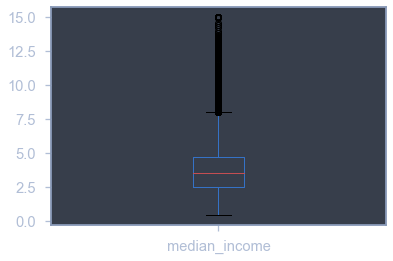

In [7]:
housing_data.boxplot(column = ['median_income'])

In [8]:
# many outliers on the top end

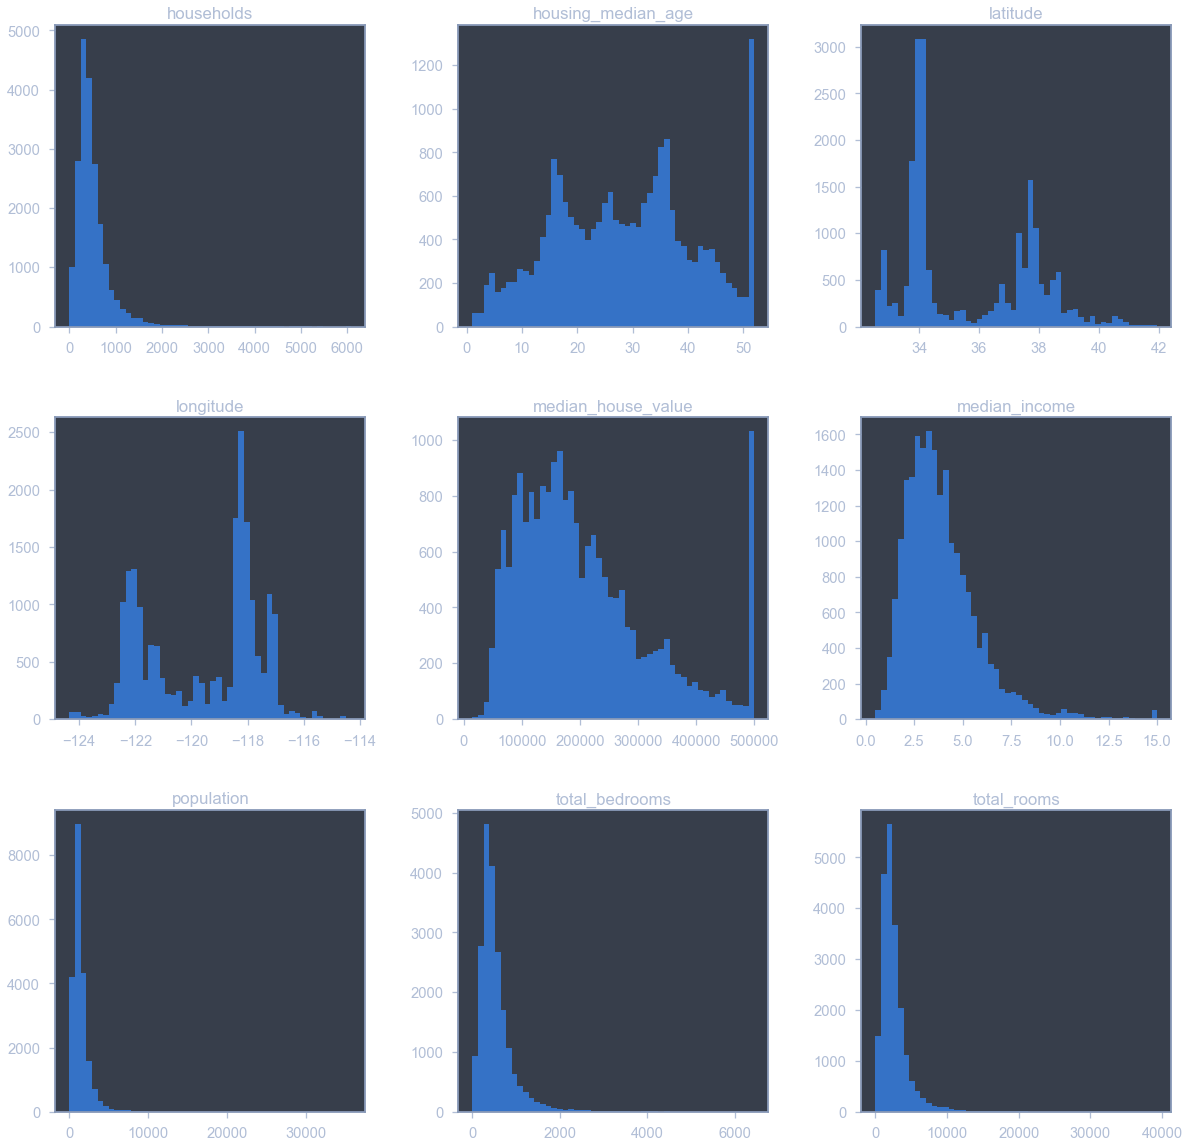

In [9]:
# plot histogram
%matplotlib inline
housing_data.hist(bins = 50, figsize = (20,20))
plt.show()

In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
min=housing_data['population'].min()/100
max=housing_data['population'].max()/100

In [25]:
cmap = sns.cubehelix_palette(dark=.3,light=.8, as_cmap=True)
cmap

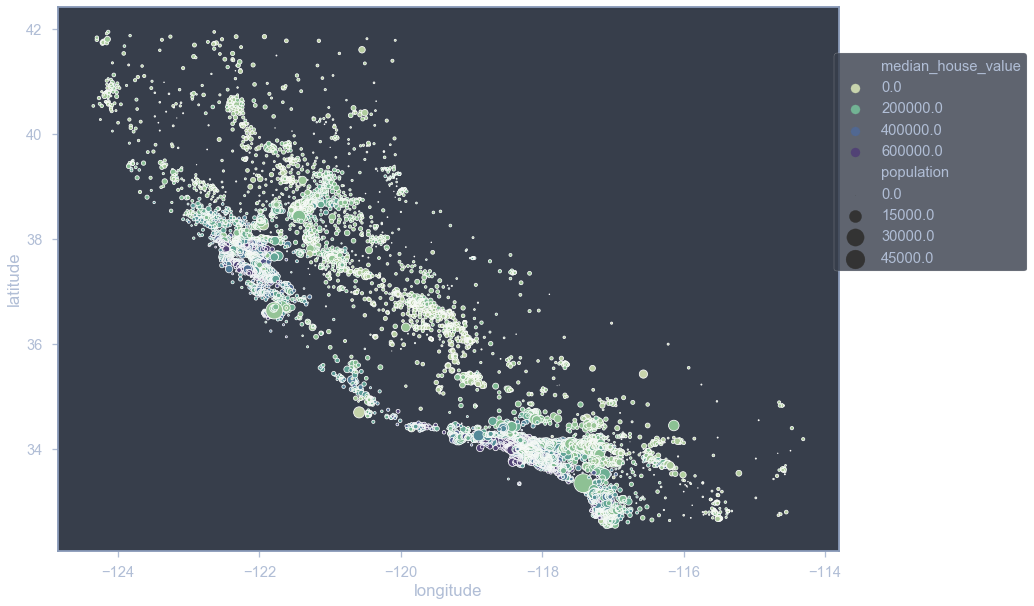

In [38]:
f,axes = plt.subplots(1,1, figsize = (14,10))
cmap = sns.cubehelix_palette(8,start = 1,rot=-1,dark=.3, light=.8, as_cmap=True)
g=sns.scatterplot(x = 'longitude', y = 'latitude',hue = 'median_house_value',size = 'population',sizes = (min,max),data = housing_data,palette= cmap, ax = axes )      
g.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5), ncol=1)

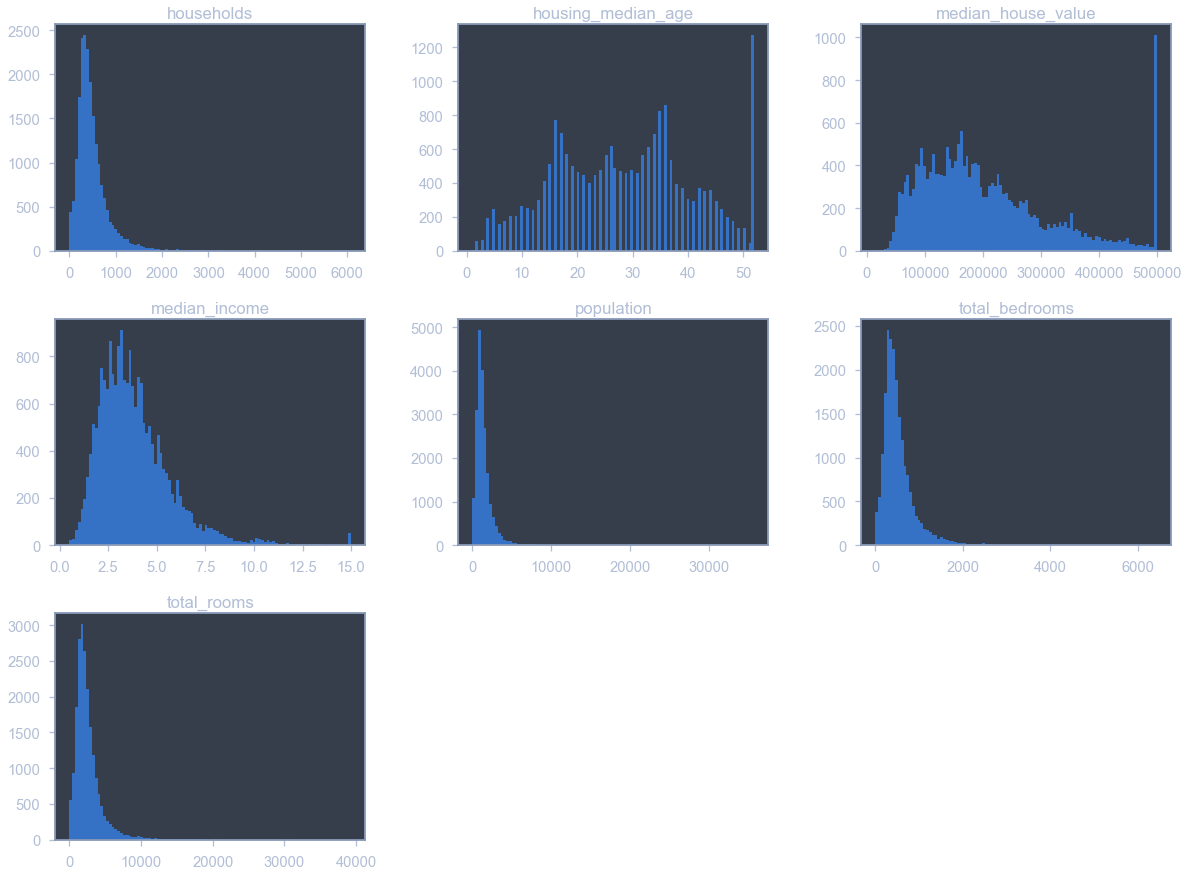

In [13]:
%matplotlib inline
housing_num = housing_data[['housing_median_age', 'total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
housing_num.hist(bins= 100, figsize = (20,15))
plt.show()
                                                        

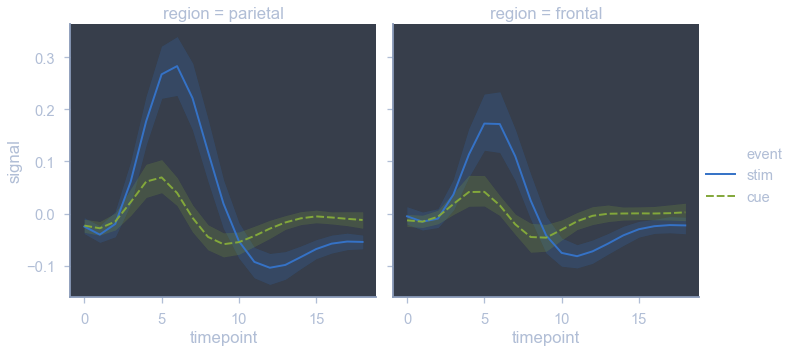

In [14]:

fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

In [15]:
tips = sns.load_dataset("tips")


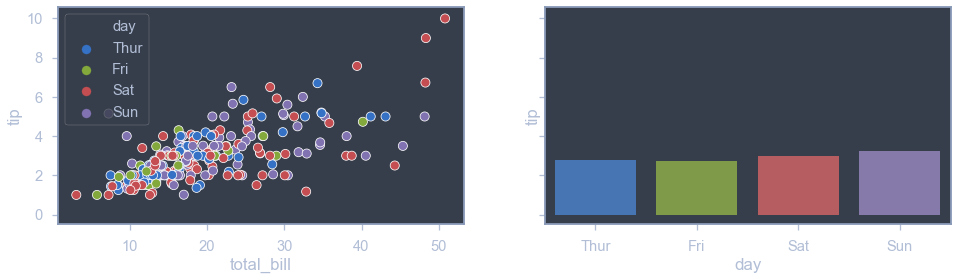

In [16]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 4))
sns.barplot(x="day", y="tip", data=tips,errwidth = 0,ax=axes[1])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[0])

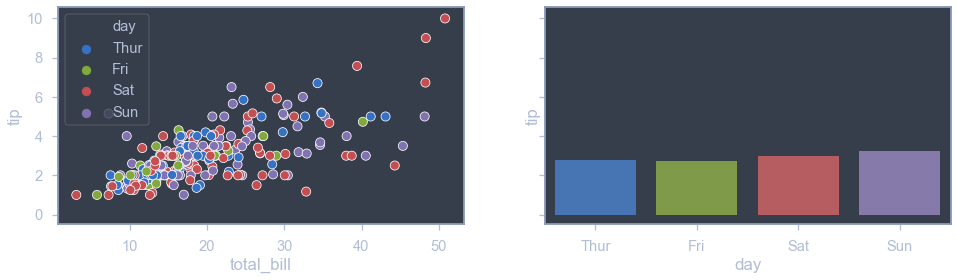

In [17]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 4))
sns.barplot(x="day", y="tip", data=tips,errwidth = 0,ax=axes[1])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[0])

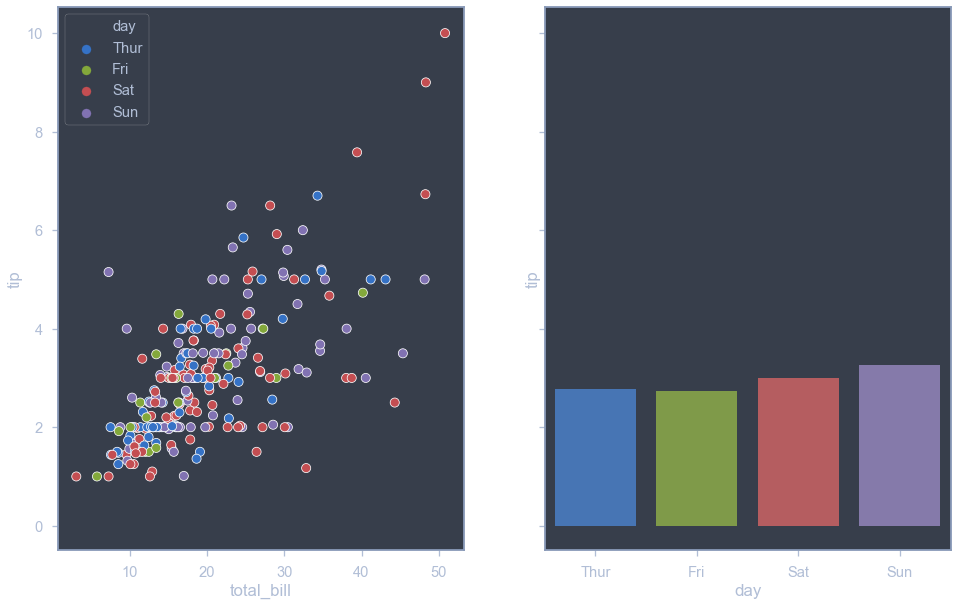

In [18]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 10))
sns.barplot(x="day", y="tip", data=tips,errwidth = 0,ax=axes[1])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[0])